# Predicting heart disease using machine learning

This notebook looks into using various python based machine learning and data science libraries in an attempt to build machine learning model capable of predicting wheather or not someone has heart disease based on the medical attributes.

We're going to take the following approach
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem defination

In a statement,
> Given clinical parameters about a patient, can we predict wheather or not they have heart disease ?

## 2. Data
The original data came from the Cleavend data from the UCI Machine learning repository.

There is a also a version of it available on Kaggle.

## 3. Evaluation

> If we can reach 95% accuracy at predicting wheather or not a patient has heart disease during the proof of concept, we'll pursue the project

## 4. Features

This is where you will get different information about each of the feature in your data.

**Create data dictionary** :
* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical**ngina, atypical angina, non-anginal, asymptomatic])**
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute 

## Preparing the tools

We are going to use Pandas, Matplotlib and numpy for data analysis and manipulation

In [3]:
# Import all the tools we need

# Regular EDA (exploratary data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from sk-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load data

In [4]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on dataset you are working with.

1. What question(s) you are tring to solve ?
2. What kind of data do we have and how do we treat different types ?
3. What is missing from the data and how do you deal with it ?
4. What are the outliers and why should you care about them ?
5. How can you add, change and remove feature to get more out of your data ?

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
# Let's find out how many of each class their
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

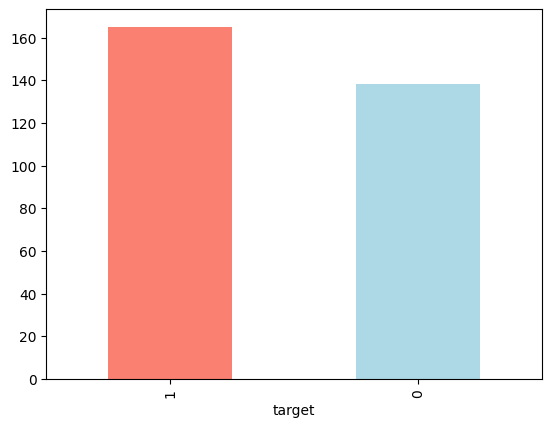

In [9]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
# Are their any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency as per sex

In [14]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [15]:
## Compare target column with sex column

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


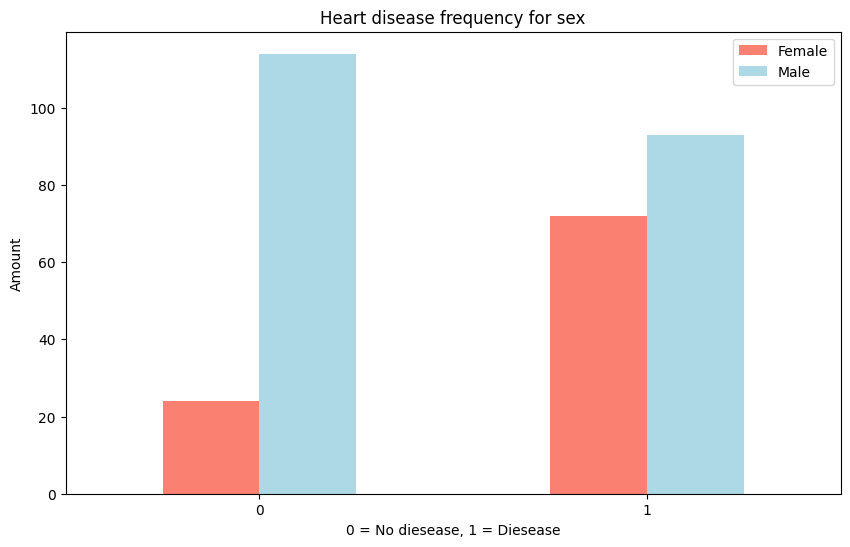

In [18]:
## Create a plot of crosstab

pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

plt.title("Heart disease frequency for sex")
plt.xlabel("0 = No diesease, 1 = Diesease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Age vs Max heart rate for heart disease

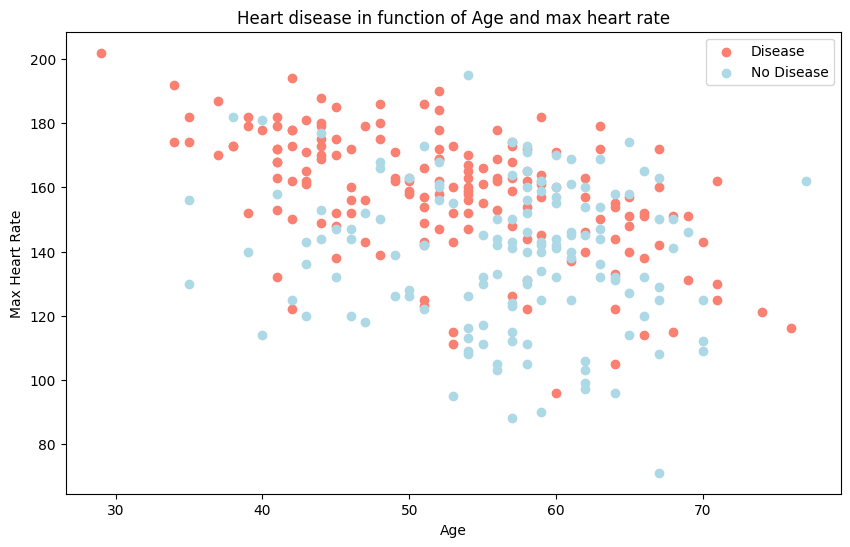

In [21]:
# create another feagure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(
    df.age[df.target==1],
    df.thalach[df.target==1],
    c="salmon")


# Scatter with negative examples
plt.scatter(
    df.age[df.target==0],
    df.thalach[df.target==0],
    c="lightblue")


# Add some helpful info
plt.title("Heart disease in function of Age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

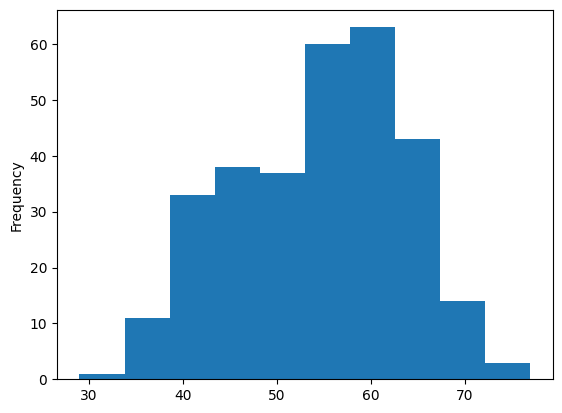

In [23]:
# check the destribution of the age column with histogram

df.age.plot.hist();

### Heart disease frequency for chest pain type

In [24]:
pd.crosstab(df.target, df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


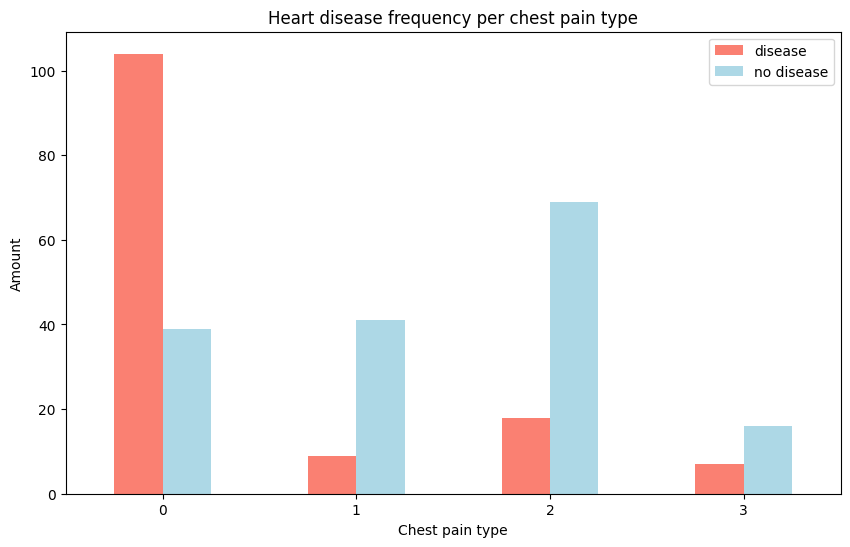

In [30]:
## make the crosstab more visual

pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10, 6),
                                  color=["salmon", "lightblue"])


# add some communication
plt.title("Heart disease frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["disease", "no disease"])
plt.xticks(rotation=0);

In [31]:
## Make a corelation metrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


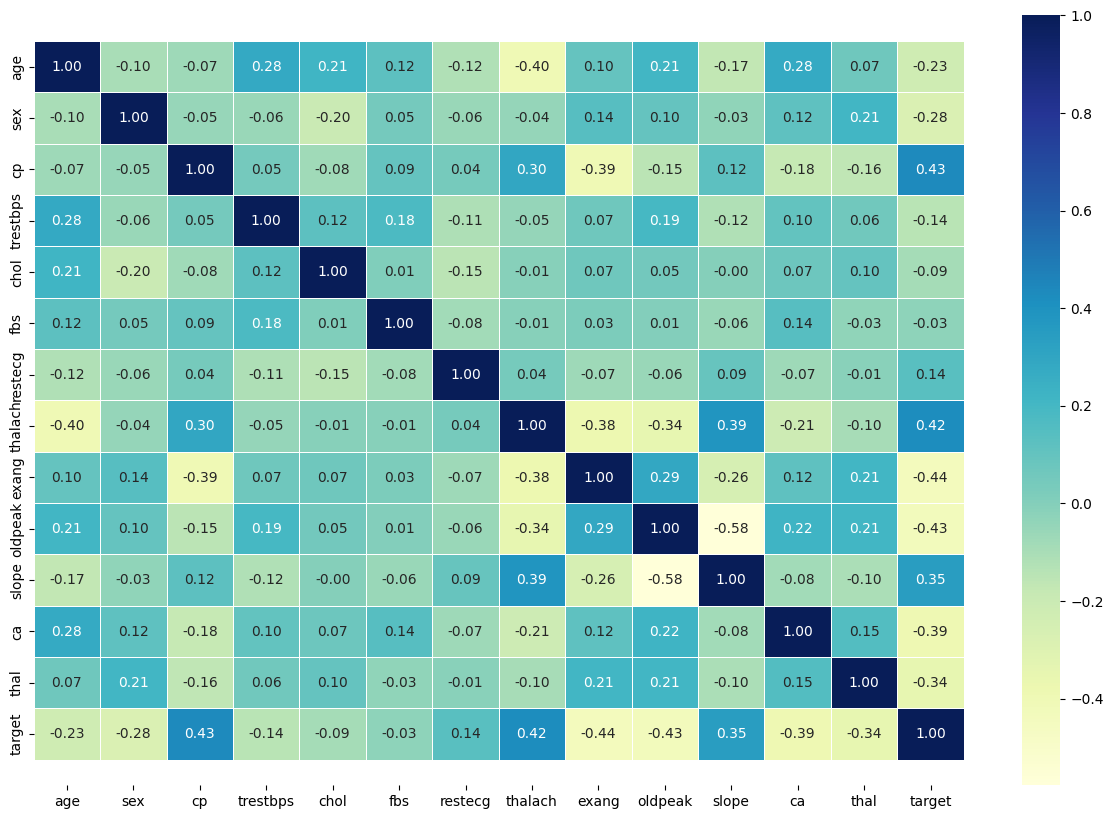

In [35]:
## Lets make our corelation matrix more visual

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

## 5. Modelling

In [36]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [37]:
# split data into X and y

X = df.drop("target", axis=1)
y = df["target"]

In [38]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [39]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [40]:
# split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

Now, we got our data split into training and test sets. Now, this is time to build machine learning model

We'll train this (find the patterns) on the training set.

And we will test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [44]:
# put models in a dict

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# create a function to fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate given machine leanring model
    models: a dict of different scikit-learn machine learning models
    X_train: training data (no lables)
    X_test: testing data (no lables)
    y_train: training lables
    y_test: testing labels
    """

    # setup random seed
    np.random.seed(42)

    # make a dict to keep model scores
    models_scores = {}

    for name, model in models.items():
        # fit the model to train data
        model.fit(X_train, y_train)
        # evaluate the model and appends its score to model_score
        models_scores[name] = model.score(X_test, y_test)

    return models_scores

In [45]:
model_scores = fit_and_score(
    models=models,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test
)

model_scores

/opt/conda/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparision

<Axes: >

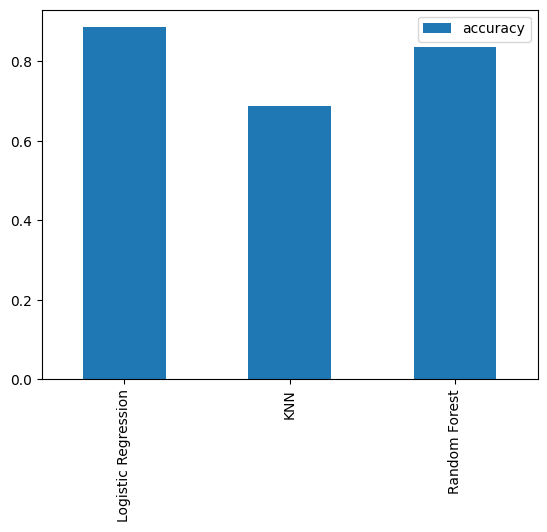

In [51]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

Now, we have a baseline model and we know the models first prediction are not always what we should based on our next steps off. What should we do ?

Let's look at the following!!
* Hyper parameter tuning
* feature importance
* confussion matrix
* Cross validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC
* Area under curve (AUC)

### Hyper parameter tuning

In [52]:
# Lets tune KNN

train_scores = []
test_scores = []

# create a list of differnt values for different neighbors
neighbors = range(1, 21)

# setup KNN instance
knn = KNeighborsClassifier()

# loop through different neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # fit the algorithm
    knn.fit(X_train, y_train)

    # update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [53]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [54]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41


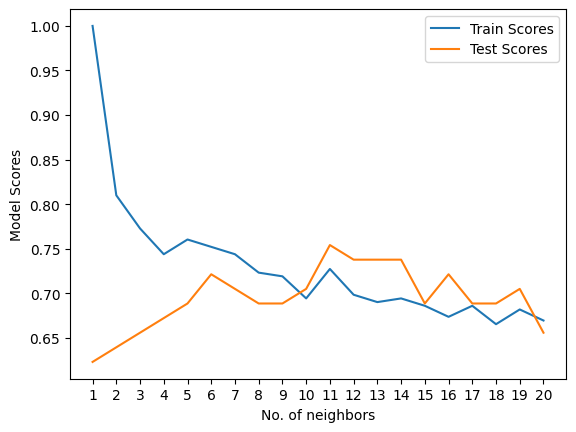

In [57]:
plt.plot(neighbors, train_scores, label="Train Scores")
plt.plot(neighbors, test_scores, label="Test Scores")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("No. of neighbors")
plt.ylabel("Model Scores")
plt.legend();

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}")

### Hyperparameter tuning with RandomizedSearchCV

WE are going to tune:
* LogisticRegression()
* RandomForestClassifier()

..... using Randomized Search CV

In [64]:
# create a hyper parameter grid for logistic regressor

log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}


# create hyper parameter grid for random forest classifier
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

Now, we have got hyper parameter grids setup for each of our models, let's tune them using RandomizedSearchCV.

In [61]:
# tune logistic regression
np.random.seed(42)

# setup random hyperparameters search for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               cv=5,
                               verbose=True,
                               param_distributions=log_reg_grid,
                               n_iter=20)


# fit random hyperparameter search model for logistic regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [62]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now, we tuned logistic regressor. lets do the same with random forest classifier

In [65]:
# tune random forest classifier
np.random.seed(42)

# setup random hyperparameters search for random forest classifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               cv=5,
                               verbose=True,
                               param_distributions=rf_grid,
                               n_iter=20)


# fit random hyperparameter search model for random forest classifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [66]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [67]:
# evaluate the randomized search random forest classifier
rs_rf.score(X_test, y_test)

0.8688524590163934

### hyper parameters tuning using GridSearchCv

since our logistic regressor model provides the best scores so far, we will try and improve this agian using GridSearchCV

In [68]:
# different hyperparameters for our logistic regression model

log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# setup grid search cv for logistic regressor
gs_log_req = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# fit the grid hyperparameters model
gs_log_req.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [69]:
# check the best hyper parameter
gs_log_req.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [71]:
# evaluate the grid search logistic model
gs_log_req.score(X_test, y_test)

0.8852459016393442

## evaluate our ml model beyond accuracy

* roc and auc
* confussion matrix
* classification report
* precision
* recall
* f1

... and it would be great if cross validation was used where possible

To make comparision and evaluate our trained model, first we need to make predictions

In [72]:
# make predictions with tuned model


y_preds = gs_log_req.predict(X_test)

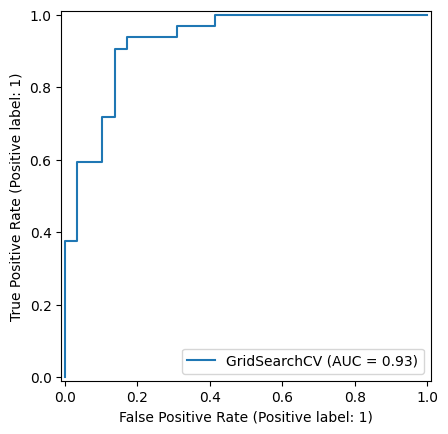

In [73]:
## plot roc and calculate auc

RocCurveDisplay.from_estimator(gs_log_req, X_test, y_test)

In [75]:
# confusion matrix

print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


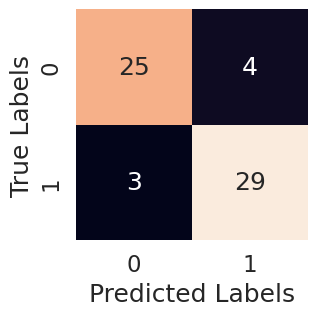

In [77]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)

    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")

plot_conf_mat(y_test, y_preds)

Now, we have a roc curve and a confusion matrix, lets get a classification report as well as cross validated precision, recall, and f1

In [79]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### calculate evalution matrix using cross validation

we are going to calculate precision, recall and f1 of our model using cross validaiton and for this we will use `cross_val_Score()`

In [80]:
gs_log_req.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [83]:
# create a new classifier with these params

clf  = LogisticRegression(C= 0.20433597178569418, solver= 'liblinear')

In [91]:
# cross validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")

cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [92]:
# cross validated precision

# cross validated accuracy
cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="precision")

cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [93]:
# cross validated recall

cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [94]:
# cross validated f1 score

cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")

cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

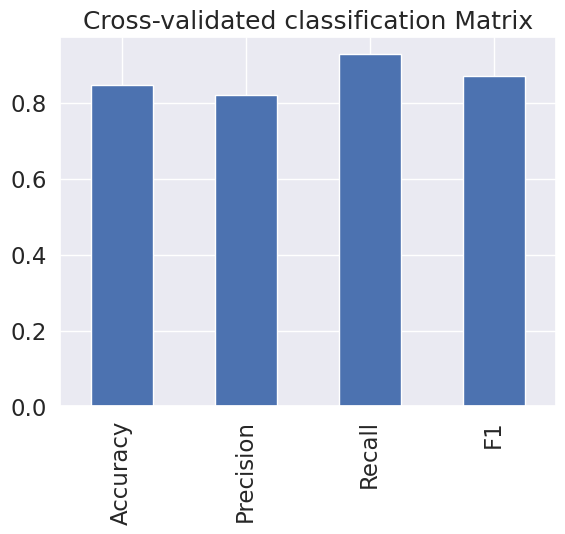

In [95]:
# visualize cross validation matrix

cv_matrix = pd.DataFrame(
    {
        "Accuracy":cv_acc,
        "Precision":cv_precision,
        "Recall":cv_recall,
        "F1":cv_f1
    },
    index = [0]
)

cv_matrix.T.plot.bar(title="Cross-validated classification Matrix", legend=False);

### Feature Importance

which feature contributed most to the outcomes of our model and how did they contribute ?

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance"

lets find out the features importance for our logistic regression model

In [97]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [98]:
## fit an instance of LogisticRegressor

clf  = LogisticRegression(C= 0.20433597178569418, solver= 'liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [99]:
# check coefficients
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067041, -0.01156993, -0.00166374,
         0.04386108,  0.31275846,  0.02459361, -0.6041308 , -0.56862804,
         0.45051627, -0.63609897, -0.67663373]])

In [100]:
# match coef's of features to columns

feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801831945955,
 'sex': -0.8604464992221635,
 'cp': 0.6606704076953431,
 'trestbps': -0.01156993182076381,
 'chol': -0.0016637442752550657,
 'fbs': 0.04386107633928844,
 'restecg': 0.3127584587290953,
 'thalach': 0.02459361358539257,
 'exang': -0.6041307963247537,
 'oldpeak': -0.568628040065182,
 'slope': 0.4505162742005374,
 'ca': -0.6360989662417856,
 'thal': -0.6766337320950861}

In [102]:
# visualize feature importance

feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003167,-0.860446,0.66067,-0.01157,-0.001664,0.043861,0.312758,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634


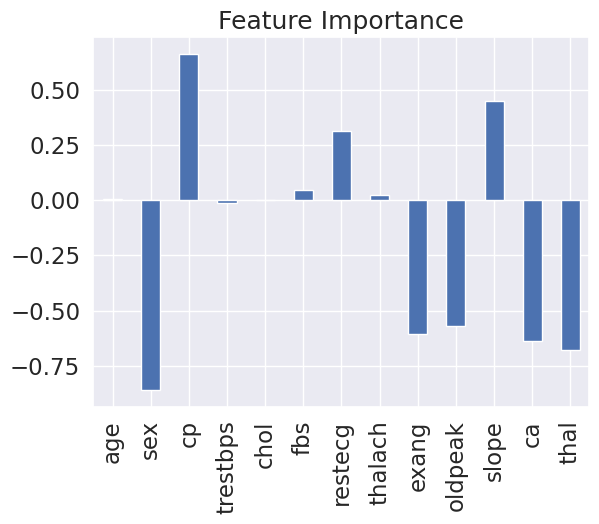

In [103]:
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [104]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [105]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

If you have not hit your evaluation metrics yet ...... ask yourself .....

* Could you collect more data ?
* Could you try a better model ? Like CatBoost and XGBoost ?
* Could you improve the current model ? (beyound what we have done so far)
* If you model is good enough ( you have hit your evaluation matrics) how would you export this and share with this others ?